In [12]:
cd C:\Users\allis\Desktop\Data Science\Project Showcase\Data_Visualization\data

C:\Users\allis\Desktop\Data Science\Project Showcase\Data_Visualization\data


In [7]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
%matplotlib inline


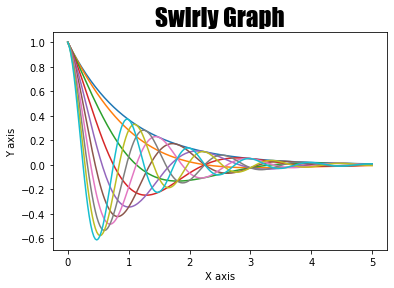

In [8]:
def f(x,o):
    return np.cos(np.pi*o* x)* np.exp(-x)

o_values = np.linspace(0 ,2 ,10)
x = np.linspace(0,5,200)
fig, ax = plt.subplots()

for o in o_values:
    ax.plot(x,f(x,o))
plt.title('Swirly Graph', fontdict={'fontname' : 'impact','fontsize' : 25})
plt.xlabel('X axis')
plt.ylabel('Y axis')


plt.show()

#### Tennis dataset visualization

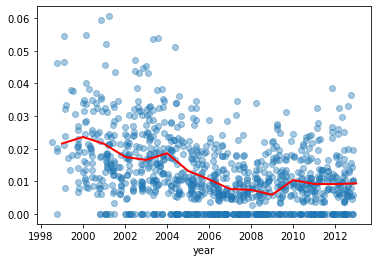

In [9]:
df = pd.read_csv('tennis.csv')
df.head(10)

x = pd.to_datetime(df['start date'])
y = df['player1 double faults']/df['player1 total points total']
xlabel = df['start date']

plt.xlabel('year')
plt.scatter(x,y,alpha = .4,)

df['ratio'] = df['player1 double faults']/df['player1 total points total']
x = [pd.Timestamp(year=year, month=12, day=31) for year in df.groupby('year')['year'].min()]
y = df.groupby('year')['ratio'].mean()

plt.plot(x,y,'r-',linewidth = 2)
plt.show()

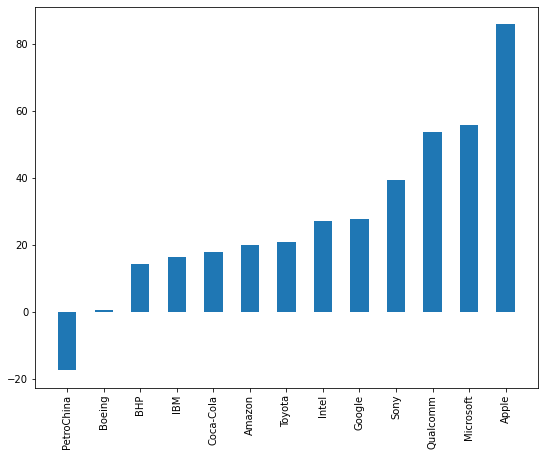

In [10]:
import datetime as dt
from pandas_datareader import data
ticker_list = {'INTC': 'Intel',
               'MSFT': 'Microsoft',
               'IBM': 'IBM',
               'BHP': 'BHP',
               'TM': 'Toyota',
               'AAPL': 'Apple',
               'AMZN': 'Amazon',
               'BA': 'Boeing',
               'QCOM': 'Qualcomm',
               'KO': 'Coca-Cola',
               'GOOG': 'Google',
               'SONY': 'Sony',
               'PTR': 'PetroChina'}
def read_data(ticker_list,
          start=dt.datetime(2019, 1, 2),
          end=dt.datetime(2019, 12, 31)):
    """
    This function reads in closing price data from Yahoo
    for each tick in the ticker_list.
    """
    ticker = pd.DataFrame()

    for tick in ticker_list:
        prices = data.DataReader(tick, 'yahoo', start, end)
        closing_prices = prices['Close']
        ticker[tick] = closing_prices

    return ticker

ticker = read_data(ticker_list)
percent_change = 100 * ((ticker.iloc[-1]-ticker.iloc[0])/ticker.iloc[0])


xnames = []
for i in (percent_change.sort_values().index):
    xnames.append(ticker_list[i])
plt.figure(figsize=(9,7))
plt.bar(xnames,percent_change.sort_values(), align = 'center',width = 0.5)
plt.xticks(rotation = 90)
plt.show()


In [15]:
cd C:\Users\allis\Desktop\Data Science\Project Showcase\Data_Visualization\data\movies

C:\Users\allis\Desktop\Data Science\Project Showcase\Data_Visualization\data\movies


In [16]:
#Dataframes
metadata_df = pd.read_csv('movies_metadata.csv')
credits_df = pd.read_csv('credits.csv')
ratings_small_df = pd.read_csv('ratings_small.csv')
#ratings_df = pd.read_csv('ratings.csv')
#links_df = pd.read_csv('links.csv')
links_small_df = pd.read_csv('links_small.csv')


def director_find(data):
    """Returns name of director from crew data"""
    for crew in eval(data):
        if crew['job'] == 'Director':
            return crew['name']
        
temp1_df = links_small_df.merge(ratings_small_df, how = 'inner')
temp1_df.columns = ['movieId', 'imdb_id', 'tmdbId', 'userId', 'rating', 'timestamp']

metadata_df['imdb_id'] = metadata_df['imdb_id'].str.strip('tt')
metadata_df['imdb_id'] = metadata_df['imdb_id'].fillna(0)
metadata_df['imdb_id'] = metadata_df['imdb_id'].astype(np.int64, errors = 'ignore')

temp2_df = temp1_df.merge(metadata_df, how = 'inner')
temp2_df = temp2_df.drop(columns = ['timestamp','adult','belongs_to_collection','budget','genres','homepage','original_language','original_title','overview','poster_path','popularity','production_companies','production_countries','release_date','revenue','spoken_languages','status','tagline','video',])
temp2_df['id'] = temp2_df['id'].fillna(0)
temp2_df['id'] = temp2_df['id'].astype(np.int64, errors = 'ignore')

df = temp2_df.merge(credits_df, how = 'inner')
df = df.drop_duplicates(subset=['movieId'])
df = df.reset_index()
df.loc[df.index[0], 'title']
df['director'] = df.apply(lambda _: '', axis=1)
for i in range(len(df)):
    director = director_find(df['crew'][i])
    df.loc[df.index[i], 'director'] = director
    
df.groupby(['director'])['rating'].mean().sort_values(ascending = False)

C:\Users\allis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


director
Carl Gottlieb         5.0
Russell P. Marleau    5.0
Kevin Yagher          5.0
Christian Nyby        5.0
Kinka Usher           5.0
                     ... 
David Mallet          0.5
Jonathan Winfrey      0.5
Stuart Beattie        0.5
Marino Girolami       0.5
Paul Hunter           0.5
Name: rating, Length: 3567, dtype: float64